In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

In [2]:
main_path= "R:\Cervical_Project\Data\Healthy"
os.chdir(main_path)
files = os.listdir()

In [3]:
results_folders=[]
files = os.listdir()
for file in files:
    new_path = os.path.join(main_path, file)
    print(new_path)
    if os.path.isdir(new_path) and 'results_final' in os.listdir(new_path):
        paired_path = os.path.join(new_path, 'results_final')
        results_folders.append(paired_path)

R:\Cervical_Project\Data\Healthy\20191003_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20191031_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20191107_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20191121_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20200220_Hyterectomy
1
R:\Cervical_Project\Data\Healthy\20200305_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20200928_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20201008_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20201119_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20201127_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20201214_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20210218_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20210415_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20210423_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20210526_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20210715_Hysterectomy
1
R:\Cervical_Project\Data\Healthy\20211104_Hysterectomy
1
R:\Cervical_Project\Data\Healthy

In [4]:
results_folders

['R:\\Cervical_Project\\Data\\Healthy\\20191003_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20191031_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20191107_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20191121_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20200220_Hyterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20200305_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20200928_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20201008_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20201119_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20201127_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20201214_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20210218_Hysterectomy\\results_final',
 'R:\\Cervical_Project\\Data\\Healthy\\20210415_Hysterectomy\\res

In [5]:
def normalize(image, p_min=2, p_max=99.9, dtype='float32'):
    '''
    Normalizes the image intensity so that the `p_min`-th and the `p_max`-th
    percentiles are converted to 0 and 1 respectively.
    References
    ----------
    Content-Aware Image Restoration: Pushing the Limits of Fluorescence
    Microscopy
    https://doi.org/10.1038/s41592-018-0216-7
    '''
    low, high = np.percentile(image, (p_min, p_max))
    return (image - low) / (high - low + 1e-6)

def patch_image(image):
    '''Image should be 512x512'''
    return image.reshape(2, 256, 2, 256).swapaxes(1, 2).reshape(4, 256, 256)

def stitch_image(image):
    '''Image should be 4x256x256'''
    return np.reshape(image,[2, -1, 256, 256]).swapaxes(1,2).reshape(512, 512)

def create_patches(input,start,end):
    start = int(start)
    end = int(end)
    indices = list(range(start,end+1))
    total_patches = []
    for i in indices:
        image = input[i]
        image = normalize(image,2,99.9)
        patches = patch_image(image)
        total_patches.append(patches)
    #total_patches = np.swapaxes(total_patches,0,1)\
    total_patches = np.reshape(total_patches,(-1,256,256))
    return list(total_patches)   

In [25]:
size=512
X_N = []
X_F = []
Y_N = []
Y_F = []
start_list = []
end_list = []
key_names = []
ROI_counter = 0
stack_count = 0
for result_folder in results_folders:
    roi_mats = []
    os.chdir(result_folder)
    experiment_files = os.listdir()
    for experiment_file in experiment_files:
        if experiment_file.endswith('FINAL.mat'):
            roi_mats.append(experiment_file)
    for roi in roi_mats:
        roi_name = roi[0:-4]
        key_names.append(roi_name)
        f= h5py.File(roi)
        try: 
            start_stack = f['stack_begin'][0]-1
            end_stack = f['stack_end'][0]-1
            FAD= f['FAD_frames_512_shifted']
            NADH= f['NADH_frames_512_shifted']
            stack_num = end_stack - start_stack +1
            assert stack_num > 0
            low_SNR_NADH = create_patches(NADH[3],start_stack,end_stack)
            high_SNR_NADH = create_patches(np.mean(NADH, axis=0),start_stack,end_stack)
            low_SNR_FAD = create_patches(FAD[3],start_stack,end_stack)
            high_SNR_FAD = create_patches(np.mean(FAD, axis=0),start_stack,end_stack)
            X_N.append(low_SNR_NADH)
            Y_N.append(high_SNR_NADH)
            X_F.append(low_SNR_FAD)
            Y_F.append(high_SNR_FAD)
            ROI_counter += ROI_counter
            start_list.append(stack_count*4)
            stack_count += stack_num 
            end_list.append(stack_count*4-1)
            print('Start and end found: ' + roi_name + ": images=" + str(stack_num))
        except:
            print('Data was not processed: ' + roi_name)
print('done')

Data was not processed: 20191003_Hysterectomy_ROI1_Series019_Series020_FINAL
Data was not processed: 20191003_Hysterectomy_ROI2_Series030_Series033_FINAL
Data was not processed: 20191003_Hysterectomy_ROI3_Series036_Series035_FINAL
Data was not processed: 20191031_Hysterectomy_ROI1_Series005_Series006_FINAL
Data was not processed: 20191031_Hysterectomy_ROI2_Series008_Series009_FINAL
Data was not processed: 20191031_Hysterectomy_ROI3_Series011_Series012_FINAL
Data was not processed: 20191031_Hysterectomy_ROI4_Series014_Series015_FINAL
Data was not processed: 20191031_Hysterectomy_ROI5_Series017_Series019_FINAL
Start and end found: 20191107_Hysterectomy_ROI1_FLIM 008_FLIM 2_016_FLIM 014_FLIM 2_022_FINAL: images=[40.]
Start and end found: 20191121_Hysterectomy_ROI1_Series004_Series005_FINAL: images=[25.]
Start and end found: 20191121_Hysterectomy_ROI2_Series012_Series014_FINAL: images=[33.]
Start and end found: 20191121_Hysterectomy_ROI3_Series021_Series022_FINAL: images=[29.]
Start and en

In [20]:
# TODO (nvora01): Fix the way start list saves the initial index of 0
start_list[0]=np.array([int(start_list[0])])
stack_begin = [item for sublist in start_list for item in sublist]
stack_end = [item for sublist in end_list for item in sublist]

In [23]:
X_n = [item for sublist in X_N for item in sublist]
Y_n = [item for sublist in Y_N for item in sublist]
X_f = [item for sublist in X_F for item in sublist]
Y_f = [item for sublist in Y_F for item in sublist]

In [24]:
np.savez('R:\\Cervical_Project\\Data\\NV_823_NADH_healthy', X=X_n, Y=Y_n, SB=stack_begin, SE=stack_end)
np.savez('R:\\Cervical_Project\\Data\\NV_823_FAD_healthy', X=X_f, Y=Y_f, SB=stack_begin, SE=stack_end)

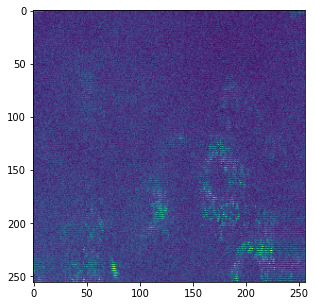

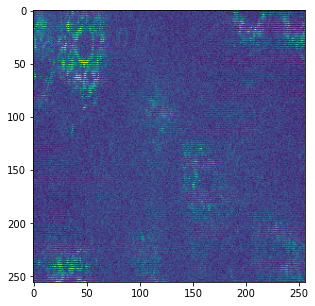

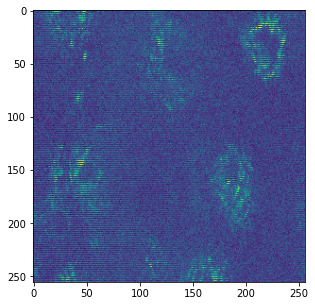

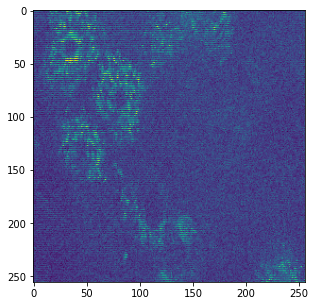

In [190]:
plt.figure(figsize = [5,5])
plt.imshow(Y_n[0])
plt.figure(figsize = [5,5])
plt.imshow(Y_n[1])
plt.figure(figsize = [5,5])
plt.imshow(Y_n[2])
plt.figure(figsize = [5,5])
plt.imshow(Y_n[3])

In [211]:
from tensorflow.image import ssim as ssim
x = np.expand_dims(X_n[2],2)
y = np.expand_dims(Y_n[2],2)
print(ssim(x,y,1,k2=0.05))

tf.Tensor(0.97537684, shape=(), dtype=float32)


In [41]:
n_images=len(X_n)
print(n_images)
n_val   = int(round(n_images * 0.15))
n_train = n_images - n_val
X_t, Y_t = X_n[-n_val:],  Y_n[-n_val:]

3664


In [40]:
n=133

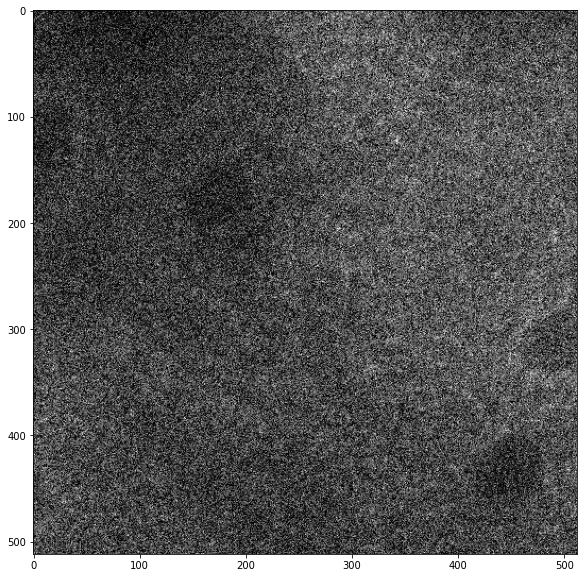

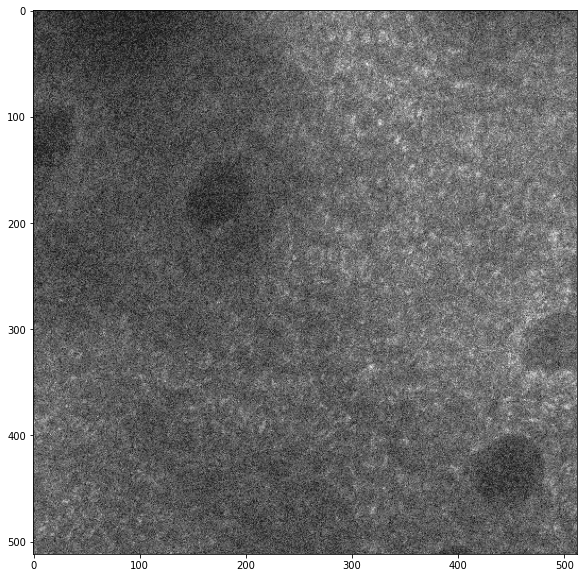

In [45]:
plt.figure(figsize = [10,10])
g= np.reshape(X_t[4*n+2:4*n+6],[2, -1, 256, 256]).swapaxes(1,2).reshape(512, 512)
#patches= image.reshape(2, 256, -1, 256).swapaxes(1, 2).reshape(-1, 256, 256)
plt.imshow(g,cmap='Greys_r')
g2=np.reshape(Y_t[4*n+2:4*n+6],[2, -1, 256, 256]).swapaxes(1,2).reshape(512, 512)
plt.figure(figsize = [10,10])
plt.imshow(g2,cmap='Greys_r')
# plt.figure(figsize = [5,5])
# plt.imshow(Y_n[0])
# plt.figure(figsize = [5,5])
# plt.imshow(Y_n[1])
# plt.figure(figsize = [5,5])
# plt.imshow(Y_n[2])

In [59]:
X_val=X_t[4*n+2:4*n+6]
Y_val=Y_t[4*n+2:4*n+6]
print(np.shape(X_val))
print(np.shape(Y_val))

(4, 256, 256)
(4, 256, 256)


In [47]:
def normalize(image, p_min=2, p_max=99.9, dtype='float32'):
    '''
    Normalizes the image intensity so that the `p_min`-th and the `p_max`-th
    percentiles are converted to 0 and 1 respectively.
    References
    ----------
    Content-Aware Image Restoration: Pushing the Limits of Fluorescence
    Microscopy
    https://doi.org/10.1038/s41592-018-0216-7
    '''
    low, high = np.percentile(image, (p_min, p_max))
    return (image - low) / (high - low + 1e-6)

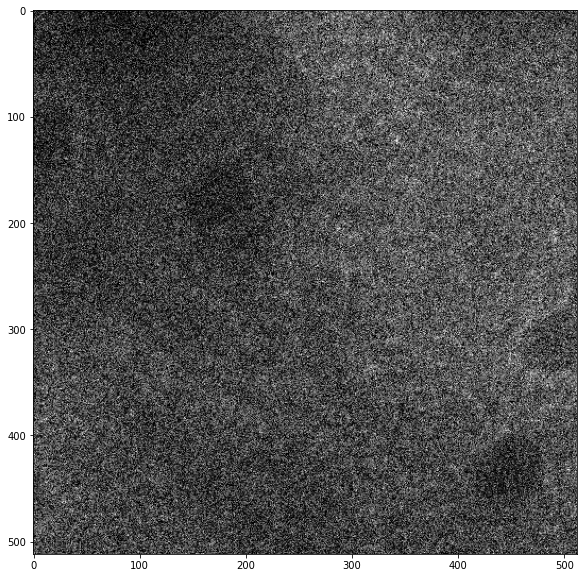

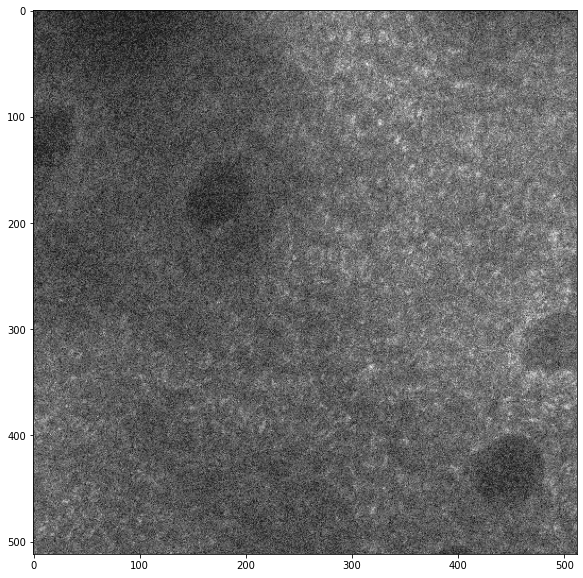

In [60]:
# for p in range(len(X_val)):
#     X_val[p] = normalize(X_val[p],2,99.9)
#     Y_val[p] = normalize(Y_val[p],2,99.9)
g= np.reshape(X_val,[2, -1, 256, 256]).swapaxes(1,2).reshape(512, 512)
g2=np.reshape(Y_val,[2, -1, 256, 256]).swapaxes(1,2).reshape(512, 512)
X_val = normalize(g,2,99.9)
Y_val = normalize(g2,2,99.9)
plt.figure(figsize = [10,10])
g= X_val
plt.imshow(g,cmap='Greys_r')
g2=Y_val
plt.figure(figsize = [10,10])
plt.imshow(g2,cmap='Greys_r')

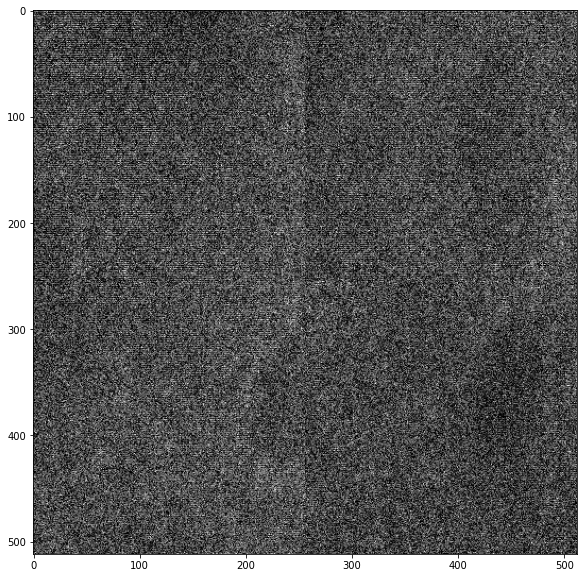

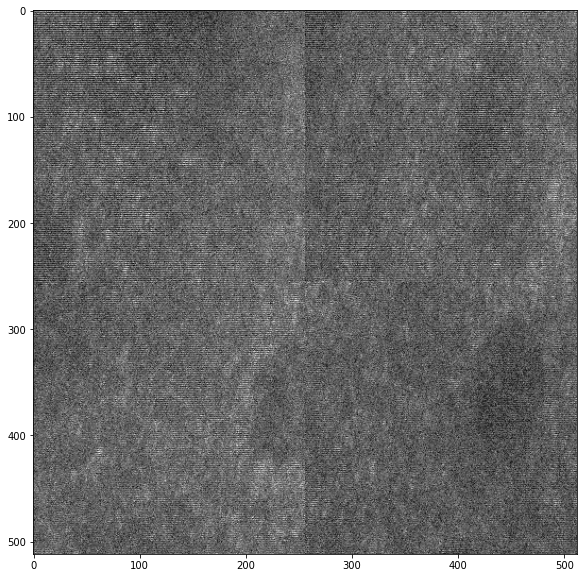

In [57]:
plt.figure(figsize = [10,10])
g= np.reshape(X_val,[2, -1, 256, 256]).swapaxes(1,2).reshape(512, 512)
plt.imshow(g,cmap='Greys_r')
g2=np.reshape(Y_val,[2, -1, 256, 256]).swapaxes(1,2).reshape(512, 512)
plt.figure(figsize = [10,10])
plt.imshow(g2,cmap='Greys_r')

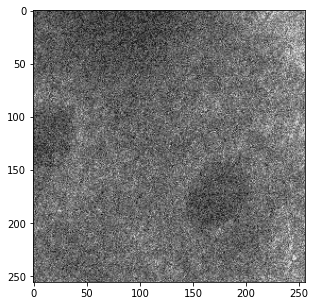

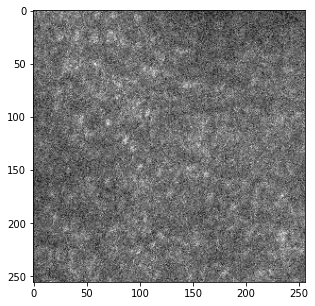

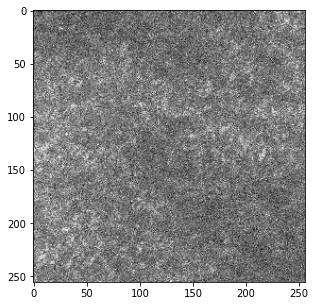

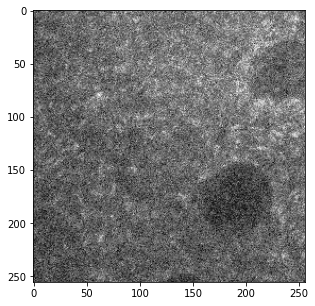

In [50]:
plt.figure(figsize = [5,5])
plt.imshow(Y_val[0],cmap='Greys_r')
plt.figure(figsize = [5,5])
plt.imshow(Y_val[1],cmap='Greys_r')
plt.figure(figsize = [5,5])
plt.imshow(Y_val[2],cmap='Greys_r')
plt.figure(figsize = [5,5])
plt.imshow(Y_val[3],cmap='Greys_r')

In [18]:
data_path = 'R:\Cervical_Project\Data'
os.chdir(data_path)
np.savez("NV_707_NADH_healthy", X=X_n, Y=Y_n)
np.savez("NV_707_FAD_healthy", X=X_f, Y=Y_f)

In [29]:
data_path = 'R:\Cervical_Project\Data'
os.chdir(data_path)
f = np.load('HealthyČ_NADH_healthy.npz')
X, Y = f['X'], f['Y']

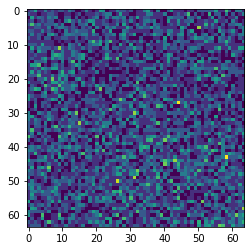

In [51]:
plt.imshow(X[3][1])

In [63]:
np.max(X_n[4][1])


0.08036911710804044

In [64]:
np.min(X_n[4][1])

0.0

In [73]:
a = (np.linspace(10,95,num=8,dtype="int"))
print(a)

[10 22 34 46 58 70 82 95]
